### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [1]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [7]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df = pd.DataFrame(lista_alumnos, columns=['nombre', 'edad', 'altura_cm'])
df.head()

,nombre,edad,altura_cm
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90


In [36]:
df.tail()

,nombre,edad,altura_cm
16,David S,27,1.70
17,Antonio J,34,1.80
18,Carlos H,27,1.77
19,Erik U,28,1.70
20,Marcos L,35,1.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nombre     21 non-null     object 
 1   edad       21 non-null     int64  
 2   altura_cm  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [6]:
df.describe()

,edad,altura_cm
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


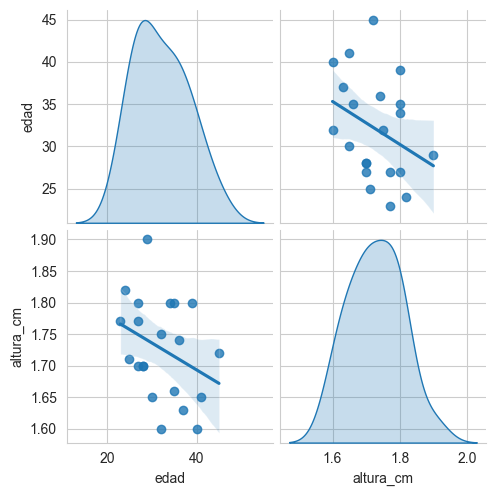

In [9]:
sns.pairplot(df, kind='reg', diag_kind='kde')

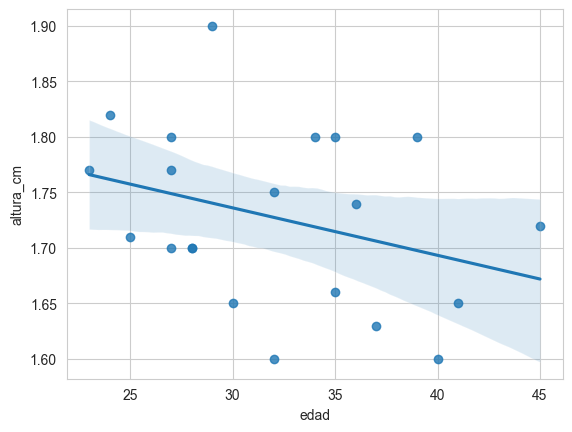

In [69]:
sns.regplot(data=df, x=df.edad, y=df.altura_cm);

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

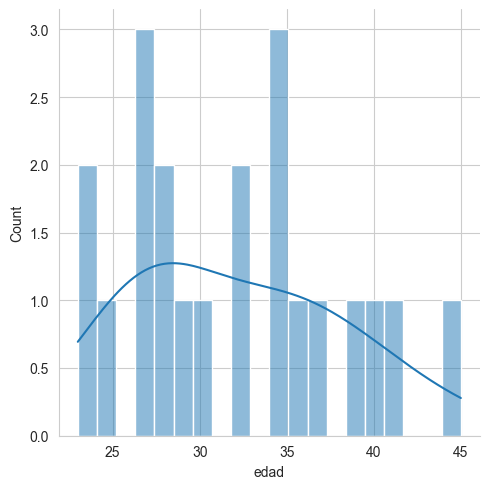

In [74]:
sns.displot(df['edad'], kde=True, bins=20);

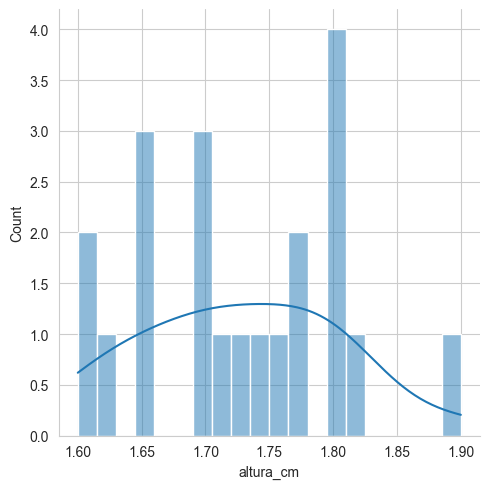

In [72]:
sns.displot(df['altura_cm'], kde=True, bins=20);

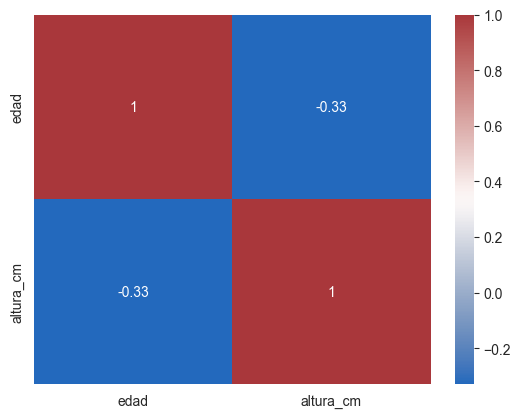

In [70]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag");

### Entrena un modelo de regresión lineal

In [14]:
df.columns

Index(['nombre', 'edad', 'altura_cm'], dtype='object')

In [20]:
X = df[['edad']]
y= df['altura_cm']

In [63]:
df['edad'].values.reshape((-1, 1))

array([[24],
       [25],
       [35],
       [37],
       [29],
       [27],
       [28],
       [32],
       [36],
       [45],
       [41],
       [30],
       [40],
       [39],
       [23],
       [32],
       [27],
       [34],
       [27],
       [28],
       [35]])

In [79]:
# entrenar modelo LR

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
# si pones en test_size un no integer es el no de registros a cojer

In [80]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (16, 1)
Train target shape: (16,)
Test features shape: (5, 1)
Test target shape: (5,)


In [81]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [82]:
# eval del modelo

print(lm.intercept_)
print(lm.coef_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

1.8732581608485224
[-0.00414067]


,Coefficient
edad,-0.004141


In [83]:
X_test

,edad
14,23
5,27
2,35
11,30
7,32


In [84]:
type(X_test)

pandas.core.frame.DataFrame

In [85]:
predictions = lm.predict(X_test)
predictions

array([1.77802286, 1.7614602 , 1.72833488, 1.7490382 , 1.74075687])

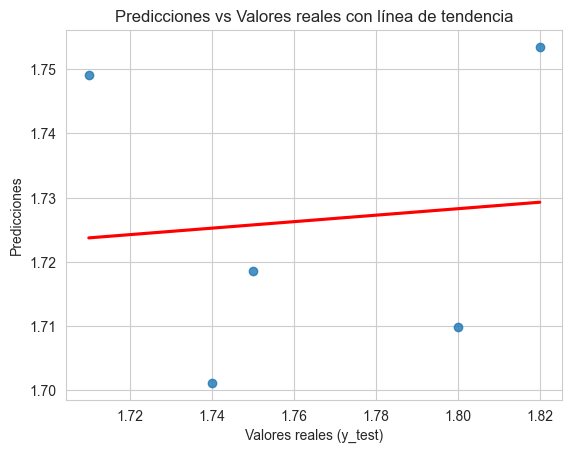

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=y_test, y=predictions, ci=None, line_kws={"color": "red"})
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales con línea de tendencia")
plt.show()

In [66]:
nuevas_edades = np.array([[26], [27], [28]])    # coeff 0.00435721
predicciones_nuevas = lm.predict(nuevas_edades)

for edad, pred in zip([26, 27, 28], predicciones_nuevas):
    print(f"Edad: {edad} años → Altura predicha: {pred} m")

Edad: 26 años → Altura predicha: 1.744763841101032 m
Edad: 27 años → Altura predicha: 1.7404066312167656 m
Edad: 28 años → Altura predicha: 1.736049421332499 m


c:\Users\Ana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


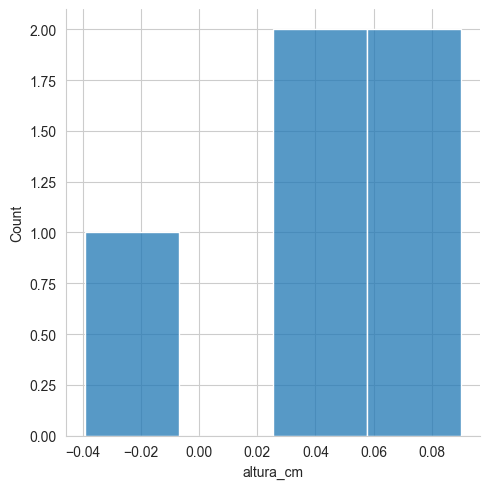

In [33]:
# residual histogram

sns.displot((y_test - predictions));

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [47]:
res_real_vs_predict = pd.DataFrame({
    "edad": X_test["edad"].values,
    "altura_real": y_test.values,
    "altura_predicha": predictions
})

res_real_vs_predict = res_real_vs_predict.sort_values(by="edad")
res_real_vs_predict


,edad,altura_real,altura_predicha
0,24,1.82,1.753478
3,25,1.71,1.749121
2,32,1.75,1.718621
1,34,1.80,1.709906
4,36,1.74,1.701192


In [52]:
# MAE manual
res_real_vs_predict['delta'] = abs(res_real_vs_predict.altura_real - res_real_vs_predict.altura_predicha)
res_real_vs_predict.delta.mean()

np.float64(0.05318486080700664)

In [57]:
# Mean Absolute Percentage Error
mape = np.mean(np.abs((res_real_vs_predict["altura_real"] - res_real_vs_predict["altura_predicha"]) / res_real_vs_predict["altura_real"]))
mape


np.float64(0.029943007687355166)

In [58]:
# Mean Squared Error (Error Cuadrático Medio)
mse = np.mean((res_real_vs_predict["altura_real"] - res_real_vs_predict["altura_predicha"]) ** 2)
mse


np.float64(0.0033126493607306545)

In [59]:
#  RMSE — Root Mean Squared Error (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)
rmse

np.float64(0.05755561971459133)

In [34]:
from sklearn import metrics

lm.score(X_test, y_test)

-1.0398087196617292

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07093852332406554
MSE: 0.007168080278572003
MAPE: 0.04302109578836768
RMSE: 0.084664516053492
